In [3]:
class TModelPoly:
    def __init__(self, x):
        self.S = 0
        self.X = x
        self.C = [0] * len(x)
        self.V = [[1] * len(x)]

    def Next(self):
        #print self.C
        r = 1
        for i in range(len(self.C)):
            r = r * self.V[self.C[i]][i]

        if self.C[0] == self.S:
            self.S = self.S + 1
            self.V.append([])
            for i in range(len(self.C)):
                self.C[i] = 0
                self.V[self.S].append(self.V[self.S - 1][i] * float(self.X[i]))
            self.C[-1] = self.S
        else:
            if self.C[-1] > 0:
                self.C[-2] = self.C[-2] + 1
                self.C[-1] = self.C[-1] - 1
            else:
                i = -2
                while self.C[i] == 0:
                    i = i - 1
                self.C[i - 1] = self.C[i - 1] + 1
                self.C[-1] = self.C[i] - 1
                self.C[i] = 0
        return r

class TPolyRegression:
    def __init__(self, s):
        self.S = s
        
    def GetPolyArray(self, x):
        pm = TModelPoly(x)
        v = []
        while pm.S <= self.S:
            v.append(pm.Next())
        return v
    
    def GenerateMX(self, x):
        from numpy.linalg import inv
        import numpy as np
        T = []
        for cp in x:
            T.append(self.GetPolyArray(cp))
        T = np.array(T)
        (cols, rows) = T.shape
        if rows > cols:
            raise BaseException("Not enough sample, need at least %d, provided %d" % (rows, cols))
        TT = T.transpose()
        return np.dot(inv(np.dot(TT, T)), TT)

    def NewY(self, MX, y):
        import numpy as np
        self.R = np.dot(MX, np.array(y))

    def Learn(self, x, y):
        import numpy as np
        MX = self.GenerateMX(x)
        self.NewY(MX, y)

    def PrepareX(self,x):
        import numpy as np
        return np.array([self.GetPolyArray(x)])

    def Predict(self, px):
        import numpy as np
        return np.dot(px, self.R)[0]

    def GetValue(self, x):
        return self.Predict(self.PrepareX(x))


In [2]:
m = [(3,0.55),(50,0.501),(100,0.454),(150,0.414),(200,0.382),(250,0.354),(300,0.33),(350,0.308),(400,0.29),(450,0.274)]

3 -0.00028217202715463685
50 0.0008264146580284626
100 -0.0002271799664849139
150 -0.0010307795408656117
200 0.00027096722358782577
250 0.0005334116155762403
300 0.0006119049238010321
350 -0.0006382015630366777
400 -0.0003615565562358758
450 0.0002971912329047255


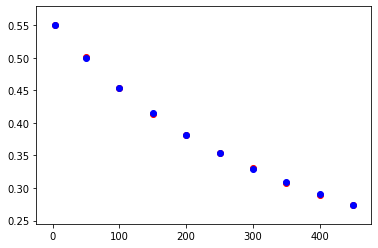

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

lx = []
ly = []
for yk,d in m:
    lx.append([yk])
    ly.append([d])

pr = TPolyRegression(3)
pr.Learn(lx,ly)    
    
x = []
y = []
p = []
for yk,d in m:
    x.append(yk)
    y.append(d)
    yp = pr.GetValue([yk])[0]
    p.append(yp)
    print(yk,d - yp)

plt.scatter(x, y, color="red")
plt.scatter(x, p, color="blue")
plt.show()


In [1]:
data = [{"ab":(1000, 200), "0": (136,139), "500":(216,128), "1000":(298,169)},
        {"ab":( 800, 300), "0": (116,110), "500":(196, 88), "1000":(291,107)},
        {"ab":( 900, 300), "0": (215, 86), "500":(283, 80), "1000":(364,119)},
        {"ab":(1000, 300), "0": (289, 83), "500":(359, 90), "1000":(417,143)},
        {"ab":( 300, 500), "0": ( 66,231), "500":(131,151), "1000":(234,106)},
        {"ab":( 500, 500), "0": (200, 87), "500":(282, 59), "1000":(374, 61)},
        {"ab":( 700, 500), "0": (365, 35), "500":(439, 36), "1000":(511, 73)},
        {"ab":( 900, 500), "0": (526, 51), "500":(583, 79), "1000":(627,150)},
        {"ab":(1000, 500), "0": (586, 82), "500":(641,122), "1000":(658,205)},
        {"ab":( 100, 600), "0": (151,348), "500":(188,240), "1000":(267,158)},
        {"ab":( 300, 600), "0": (216,137), "500":(285, 89), "1000":(381, 71)},
        {"ab":( 500, 600), "0": (361, 46), "500":(438, 38), "1000":(514, 64)},
        {"ab":( 700, 600), "0": (519, 37), "500":(587, 55), "1000":(658,111)},
        {"ab":( 900, 600), "0": (681,100), "500":(739,144), "1000":(760,229)},
        {"ab":(1000, 600), "0": (757,152), "500":(797,214), "1000":(785,305)},
        {"ab":(   0, 800), "0": (309,336), "500":(366,240), "1000":(452,173)},
        {"ab":( 100, 800), "0": (353,209), "500":(421,155), "1000":(523,134)},
        {"ab":( 300, 800), "0": (503, 95), "500":(580, 93), "1000":(688,130)},
        {"ab":( 500, 800), "0": (682, 95), "500":(764,126), "1000":(847,205)},
        {"ab":(   0,1000), "0": (452,288), "500":(547,250), "1000":(672,257)},
        {"ab":( 100,1000), "0": (559,222), "500":(656,218), "1000":(791,273)}]


In [4]:
x = []
y = []

for p in data:
    x.append(p["ab"])
    y.append(p["0"])
    
pr = TPolyRegression(5)
pr.Learn(x,y)

for p in data:
    (px,py) = pr.GetValue(p["ab"])
    (rx,ry) = p["0"]
    print(px-rx,py-ry)

xs=""
ys=""
s ="{"

for r in pr.R:
    xs += s + str(r[0])
    ys += s + str(r[1])
    s = ", "
xs += "}"
ys += "}"
print("xs=", xs)
print("ys=", ys)

0.006930520863534184 0.0018586765552299767
0.039003936451081245 0.015551653187685588
0.00831167029059543 0.00242643766796391
-0.013476567974066711 -0.0068761630734570645
0.15026535391012885 0.06361442127393957
0.05596089736573617 0.02304680168091977
-0.0003101162720327011 -0.0014976697864028665
-0.016992854607906338 -0.009104037231736584
-0.010179438685554487 -0.006316460013522374
0.18637364778081178 0.07927469068607707
0.07956950103931604 0.033348513225490706
0.012069552694811136 0.00381736119609144
-0.014822089958670404 -0.008486248770708471
0.00017817700063460506 -0.002717813700201077
0.023851450657275564 0.007218665077516562
0.0826333384575264 0.03435180366795976
0.04241493280636632 0.016681985138802702
-0.0057797911603643115 -0.0051690009489533395
-0.009805774982623916 -0.008303284797676724
0.002070649599772878 -0.0039435519283870235
-0.004345742757323023 -0.007645870791918696
xs= {-22139.407351698046, 146.02681244760615, 48.072475015170795, -0.3764678978298519, -0.283106072532499